In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [61]:
train_original = train.copy()
test_original = test.copy()

In [62]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


In [63]:
train.shape

(25053, 121)

In [64]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,9,11802,P,99,0,6306,8,2,2,2,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id0
1,255,2713,C,99,0,4409,4,2,2,2,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1
2,201,152,M,22,0,3603,4,2,2,2,...,2016,67871456.0,0.0,0.0,12093451.0,NaN,NaN,NaN,NaN,test_id2
3,302,7698,M,22,0,4203,4,2,2,2,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3
4,152,544,P,99,0,6307,4,2,2,2,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id4


In [65]:
test.shape

(10738, 120)

### checking for missing values

In [66]:
all_null_values = (train.isnull().sum() / len(train)) * 100
all_null_values = round(all_null_values.drop(all_null_values[all_null_values < 50.0].index).sort_values(ascending=False)[:100],2)
missing_data = pd.DataFrame({'Percente of null values(train)' :all_null_values})
missing_data.head(100)

,Percente of null values(train)
SND_MNTAIR_E,94.24
SND_MNTPRD_E,94.24
SND_MNTTVA_E,94.24
SND_MNTDRC_E,94.24
SND_MNTAVA_E,94.24
SND_MNTTAX_E,94.24
SND_MNTPAY_E,94.24
FAC_MNTTVA_F,91.57
FAC_MNTDCO_F,91.57
FAC_MFODEC_F,91.57


Text(0.5, 1.0, 'Percent null values by feature(Train)')

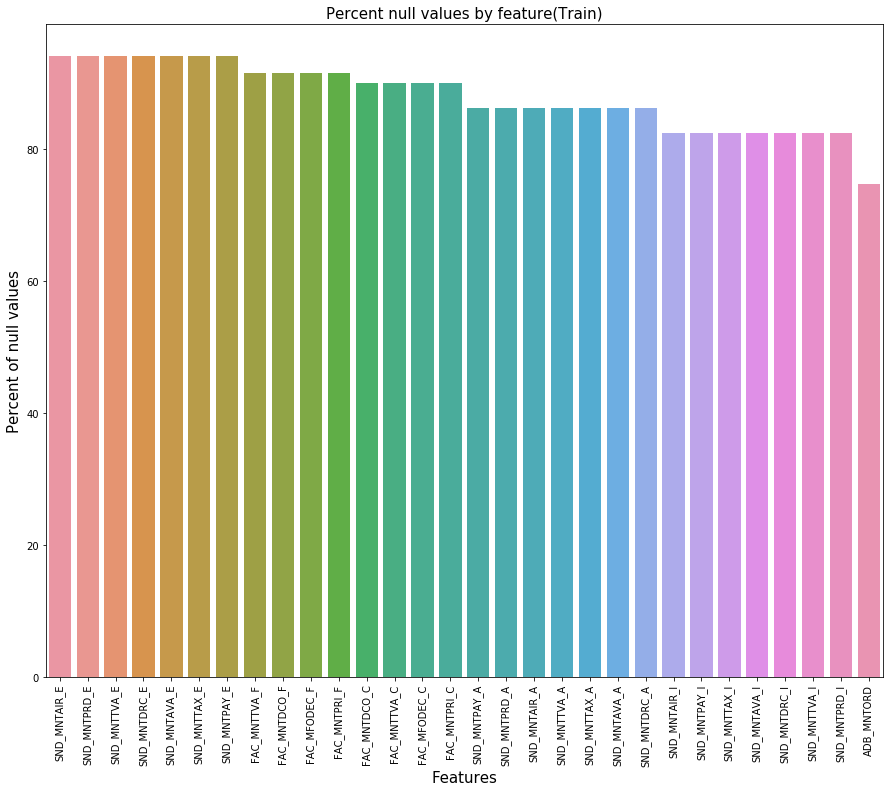

In [67]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_null_values.index, y=all_null_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of null values', fontsize=15)
plt.title('Percent null values by feature(Train)', fontsize=15)

In [68]:
all_null_values = (test.isnull().sum() / len(train)) * 100
all_null_values = round(all_null_values.drop(all_null_values[all_null_values == 0].index).sort_values(ascending=False)[:100],2)
missing_data = pd.DataFrame({'Percente of null values(test)' :all_null_values})
missing_data.head(100)

,Percente of null values(test)
SND_MNTPRD_E,40.39
SND_MNTAIR_E,40.39
SND_MNTTVA_E,40.39
SND_MNTDRC_E,40.39
SND_MNTAVA_E,40.39
SND_MNTTAX_E,40.39
SND_MNTPAY_E,40.39
FAC_MNTTVA_F,39.06
FAC_MNTDCO_F,39.06
FAC_MFODEC_F,39.06


Text(0.5, 1.0, 'Percent null values by feature(Train)')

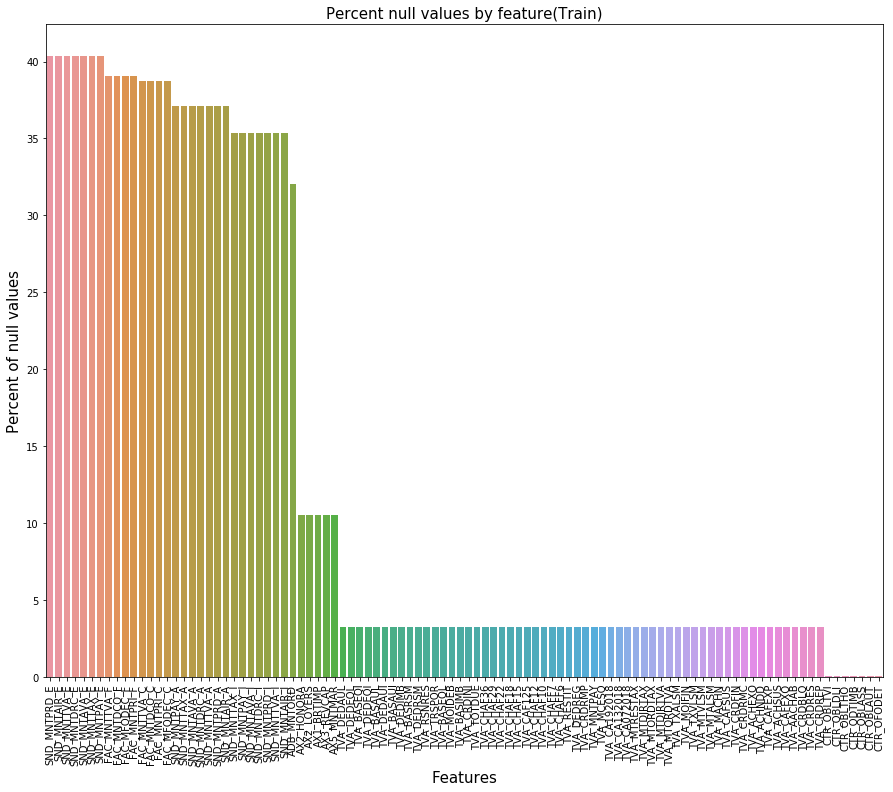

In [69]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_null_values.index, y=all_null_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of null values', fontsize=15)
plt.title('Percent null values by feature(Train)', fontsize=15)

### Removing columns with more than 50% of missing values 

In [70]:
train1 = train.drop(['SND_MNTAIR_E',
                    'SND_MNTPRD_E',
                    'SND_MNTTVA_E',
                    'SND_MNTDRC_E',
                    'SND_MNTAVA_E',
                    'SND_MNTTAX_E',
                    'SND_MNTPAY_E',
                    'FAC_MNTTVA_F',
                    'FAC_MNTDCO_F',
                    'FAC_MFODEC_F',
                    'FAC_MNTPRI_F',
                    'FAC_MNTDCO_C',
                    'FAC_MNTTVA_C',
                    'FAC_MFODEC_C',
                    'FAC_MNTPRI_C',
                    'SND_MNTPAY_A',
                    'SND_MNTPRD_A',
                    'SND_MNTAIR_A',
                    'SND_MNTTVA_A',
                    'SND_MNTTAX_A',
                    'SND_MNTAVA_A',
                    'SND_MNTDRC_A',
                    'SND_MNTAIR_I',
                    'SND_MNTPAY_I',
                    'SND_MNTTAX_I',
                    'SND_MNTAVA_I',
                    'SND_MNTDRC_I',
                    'SND_MNTTVA_I',
                    'SND_MNTPRD_I',
                    'ADB_MNTORD'], axis=1)

In [71]:
test1 = test.drop(['SND_MNTAIR_E',
                    'SND_MNTPRD_E',
                    'SND_MNTTVA_E',
                    'SND_MNTDRC_E',
                    'SND_MNTAVA_E',
                    'SND_MNTTAX_E',
                    'SND_MNTPAY_E',
                    'FAC_MNTTVA_F',
                    'FAC_MNTDCO_F',
                    'FAC_MFODEC_F',
                    'FAC_MNTPRI_F',
                    'FAC_MNTDCO_C',
                    'FAC_MNTTVA_C',
                    'FAC_MFODEC_C',
                    'FAC_MNTPRI_C',
                    'SND_MNTPAY_A',
                    'SND_MNTPRD_A',
                    'SND_MNTAIR_A',
                    'SND_MNTTVA_A',
                    'SND_MNTTAX_A',
                    'SND_MNTAVA_A',
                    'SND_MNTDRC_A',
                    'SND_MNTAIR_I',
                    'SND_MNTPAY_I',
                    'SND_MNTTAX_I',
                    'SND_MNTAVA_I',
                    'SND_MNTDRC_I',
                    'SND_MNTTVA_I',
                    'SND_MNTPRD_I',
                    'ADB_MNTORD'], axis=1)

In [72]:
train1.shape

(25053, 91)

In [73]:
test1.shape

(10738, 90)

In [74]:
numerical_features = train1.dtypes[train1.dtypes != 'object'].index

In [75]:
numerical_features

Index(['BCT_CODBUR', 'CTR_MATFIS', 'FJU_CODFJU', 'CTR_CESSAT', 'ACT_CODACT',
       'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP', 'CTR_OBLTFP',
       'CTR_OBLDCO', 'CTR_OBLTVA', 'CTR_OFODEC', 'CTR_OFODEP', 'CTR_OFODET',
       'CTR_OBLAUT', 'CTR_OBLASS', 'CTR_ODTIMB', 'CTR_OBLTCL', 'CTR_OBLTHO',
       'CTR_OBLDLI', 'CTR_OBLTVI', 'CTR_RATISS', 'EXE_EXERCI', 'TVA_CHAFF6',
       'TVA_CHAFF7', 'TVA_CHAF10', 'TVA_CHAF12', 'TVA_CAF125', 'TVA_CHAF15',
       'TVA_CHAF18', 'TVA_CHAF22', 'TVA_CHAF29', 'TVA_CHAF36', 'TVA_TOTDUE',
       'TVA_MOIDEB', 'TVA_CRDINI', 'TVA_BASIMB', 'TVA_DEDIMB', 'TVA_BASEQL',
       'TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL', 'TVA_DEDAUL',
       'TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM', 'TVA_RSNRES',
       'TVA_TRSPOR', 'TVA_DEDREG', 'TVA_RESTIT', 'TVA_MNTPAY', 'TVA_MOIFIN',
       'TVA_CRDFIN', 'TVA_ACHSUS', 'TVA_ACHEXO', 'TVA_ACHNDD', 'TVA_CAFEXP',
       'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_AACHAB', 'TVA_CRDBLQ', 'TVA_CRDRES',

In [76]:
categorical_features = train1.dtypes[train1.dtypes == 'object'].index

In [77]:
categorical_features

Index(['CTR_CATEGO_X', 'id'], dtype='object')

In [78]:
train1.CTR_CATEGO_X.isnull().sum()

0

In [79]:
categorical_features = test1.dtypes[train1.dtypes == 'object'].index

In [80]:
categorical_features

Index(['CTR_CATEGO_X', 'id'], dtype='object')

In [81]:
test1.CTR_CATEGO_X.isnull().sum()

0

### Filling missing values

In [82]:
for column in train1.columns:
    train1[column].fillna(train1[column].mode()[0], inplace=True)

In [83]:
train1.isna().sum()

BCT_CODBUR      0
CTR_MATFIS      0
CTR_CATEGO_X    0
FJU_CODFJU      0
CTR_CESSAT      0
ACT_CODACT      0
CTR_OBLDIR      0
CTR_OBLACP      0
CTR_OBLRES      0
CTR_OBLFOP      0
CTR_OBLTFP      0
CTR_OBLDCO      0
CTR_OBLTVA      0
CTR_OFODEC      0
CTR_OFODEP      0
CTR_OFODET      0
CTR_OBLAUT      0
CTR_OBLASS      0
CTR_ODTIMB      0
CTR_OBLTCL      0
CTR_OBLTHO      0
CTR_OBLDLI      0
CTR_OBLTVI      0
CTR_RATISS      0
EXE_EXERCI      0
TVA_CHAFF6      0
TVA_CHAFF7      0
TVA_CHAF10      0
TVA_CHAF12      0
TVA_CAF125      0
               ..
TVA_CAFSUS      0
TVA_CAFEXO      0
TVA_AACHAB      0
TVA_CRDBLQ      0
TVA_CRDRES      0
TVA_CRDRMP      0
TVA_CRDREP      0
TVA_CRDRMC      0
TVA_MACHN       0
TVA_MCESQ       0
TVA_MTVLSM      0
TVA_TXVLSM      0
TVA_MTALSM      0
TVA_TXALSM      0
TVA_MTORDTVA    0
TVA_MTDJRTVA    0
TVA_MTORDTAX    0
TVA_MTDJRTAX    0
TVA_MTRESTAX    0
TVA_CA072018    0
TVA_CA132018    0
TVA_CA192018    0
AX1_BRTIMP      0
AX2_HONORA      0
AX2_LOYERS

In [133]:
for column in test1.columns:
    test1[column].fillna(test1[column].mode()[0], inplace=True)

In [85]:
test1.isna().sum()

BCT_CODBUR      0
CTR_MATFIS      0
CTR_CATEGO_X    0
FJU_CODFJU      0
CTR_CESSAT      0
ACT_CODACT      0
CTR_OBLDIR      0
CTR_OBLACP      0
CTR_OBLRES      0
CTR_OBLFOP      0
CTR_OBLTFP      0
CTR_OBLDCO      0
CTR_OBLTVA      0
CTR_OFODEC      0
CTR_OFODEP      0
CTR_OFODET      0
CTR_OBLAUT      0
CTR_OBLASS      0
CTR_ODTIMB      0
CTR_OBLTCL      0
CTR_OBLTHO      0
CTR_OBLDLI      0
CTR_OBLTVI      0
CTR_RATISS      0
EXE_EXERCI      0
TVA_CHAFF6      0
TVA_CHAFF7      0
TVA_CHAF10      0
TVA_CHAF12      0
TVA_CAF125      0
               ..
TVA_CAFEXP      0
TVA_CAFSUS      0
TVA_CAFEXO      0
TVA_AACHAB      0
TVA_CRDBLQ      0
TVA_CRDRES      0
TVA_CRDRMP      0
TVA_CRDREP      0
TVA_CRDRMC      0
TVA_MACHN       0
TVA_MCESQ       0
TVA_MTVLSM      0
TVA_TXVLSM      0
TVA_MTALSM      0
TVA_TXALSM      0
TVA_MTORDTVA    0
TVA_MTDJRTVA    0
TVA_MTORDTAX    0
TVA_MTDJRTAX    0
TVA_MTRESTAX    0
TVA_CA072018    0
TVA_CA132018    0
TVA_CA192018    0
AX1_BRTIMP      0
AX2_HONORA

### Exploratory data analysis 

In [86]:
train1.CTR_CATEGO_X.value_counts(normalize=True)

M    0.511276
C    0.272822
P    0.215463
N    0.000439
Name: CTR_CATEGO_X, dtype: float64

### Target variable

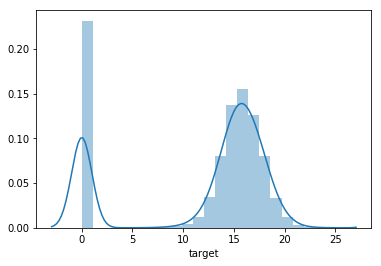

In [87]:
sns.distplot(train1.target)

In [88]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train1.corr()
corr.sort_values(["target"], ascending = False, inplace = True)
print(corr.target)

Find most important features relative to target
target          1.000000
FJU_CODFJU      0.131814
CTR_OBLACP      0.055753
CTR_OBLDLI      0.055695
CTR_OBLDIR      0.049884
CTR_OBLAUT      0.024553
CTR_RATISS      0.024520
ACT_CODACT      0.023847
CTR_OBLTCL      0.021446
TVA_MNTPAY      0.014776
CTR_OBLFOP      0.014249
TVA_CA192018    0.011085
TVA_CHAF22      0.009144
CTR_OBLTVI      0.008989
TVA_CHAF10      0.006216
CTR_MATFIS      0.004369
CTR_OFODEP      0.003910
TVA_DEDEQI      0.003474
TVA_MTRESTAX    0.003082
TVA_MTDJRTAX    0.003082
CTR_OBLDCO      0.002521
CTR_OFODET      0.002484
EXE_EXERCI      0.002420
RES_ANNIMP      0.002420
TVA_ACHSUS     -0.000473
TVA_ACHNDD     -0.000473
TVA_AACHAB     -0.001058
TVA_ACHEXO     -0.001157
TVA_RSNRES     -0.001290
CTR_OBLTFP     -0.005478
                  ...   
TVA_CAFEXO     -0.023213
TVA_CRDBLQ     -0.023571
AX2_LOYERS     -0.024521
TVA_MOIFIN     -0.026456
TVA_DEDAUL     -0.028666
TVA_BASAUL     -0.029004
TVA_DEDREG     -0.030177
TV

In [89]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [90]:
X= train1.drop(['id', 'target'], axis=1)
y= train1.target
test1 = test1.drop('id', axis=1)

In [91]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [92]:
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,CTR_CATEGO_X
0,3
1,3
2,3
3,1
4,3
5,0
6,0
7,1
8,0
9,3


In [93]:
test_categorical_feature_mask = test1.dtypes==object
# filter categorical columns using mask and turn it into a list
test_categorical_cols = test1.columns[test_categorical_feature_mask].tolist()

In [94]:

test1[test_categorical_cols] = test1[test_categorical_cols].apply(lambda col: le.fit_transform(col))
test1[test_categorical_cols].head(10)

,CTR_CATEGO_X
0,2
1,0
2,1
3,1
4,2
5,0
6,1
7,1
8,2
9,1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test1.shape)

(17537, 89)
(7516, 89)
(17537,)
(7516,)
(10738, 89)


In [96]:
scaller = MinMaxScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)
test1_scaled = scaller.transform(test1)

## modeling

In [122]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error

In [98]:
lr = LinearRegression().fit(X_train_scaled, y_train)


In [99]:
y_predicted = lr.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted, y_test)))

6.939850823799201


In [100]:
ridge = Ridge().fit(X_train_scaled, y_train)


In [101]:
y_predicted1 = ridge.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted1, y_test)))

6.936345969957007


In [102]:
lasso = Lasso().fit(X_train_scaled, y_train)

In [103]:
y_predicted2 = lasso.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted2, y_test)))

7.130370324691103


In [120]:
alphas = [0.0000000000000001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [121]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train_scaled, y_train)   
    score = model.score(X_train_scaled, y_train)
    pred_y = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0000, R2:0.06, MSE:48.17, RMSE:6.94
Alpha:0.0001, R2:0.05, MSE:48.10, RMSE:6.94
Alpha:0.0010, R2:0.04, MSE:48.37, RMSE:6.95
Alpha:0.0100, R2:0.03, MSE:49.07, RMSE:7.01
Alpha:0.1000, R2:0.02, MSE:49.83, RMSE:7.06
Alpha:0.3000, R2:0.01, MSE:50.29, RMSE:7.09
Alpha:0.5000, R2:0.01, MSE:50.55, RMSE:7.11
Alpha:0.7000, R2:0.00, MSE:50.77, RMSE:7.13
Alpha:1.0000, R2:0.00, MSE:50.84, RMSE:7.13


In [109]:
RFR = RandomForestRegressor()
RFR.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [110]:
y_predicted3 = RFR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted3, y_test)))

5.835493225520687


In [139]:
idd = RFR.predict(test1_scaled)

In [141]:
test_original['id']=idd
test_original.to_csv('submission.csv')

In [124]:
ADR = AdaBoostRegressor()
ADR.fit(X_train_scaled, y_train)

AdaBoostRegressor()

In [125]:
y_predicted_adb = ADR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted_adb, y_test)))

6.494314456765755


In [128]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [129]:
y_predicted_GBR = GBR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted_GBR, y_test)))

6.149712629349884


In [137]:
xgb = XGBRFRegressor().fit(X_train_scaled, y_train)

[19:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [138]:
y_predicted4 = xgb.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted4, y_test)))

6.410007514233043


In [113]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid


In [114]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=2, verbose=2, random_state=42, n_jobs = -1)
